In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysisTests.datafiles import PSF, DCD
from MDAnalysis.analysis import contacts

This document should go through the different use cases the new contacts class can be used for and how flexible it is. I think this is a good way to show each other what is and what isn't possible with this class right now. I also plan to use this notebook as a basis to write docs and tests.



# Native Contact Analysis

Typical Native Contact Analysis that @jandom had in my for this class

In [2]:
u = mda.Universe(PSF, DCD)

In [23]:
sel_basic = "(resname ARG or resname LYS) and (name NH* or name NZ)"
sel_acidic = "(resname ASP or resname GLU) and (name OE* or name OD*)"

acidic = u.select_atoms(sel_acidic)
basic = u.select_atoms(sel_basic)

In [10]:
nc = contacts.Contacts(u, selection=(sel_acidic, sel_basic),
                       refgroup=(acidic, basic))

In [11]:
nc.run()

In [20]:
f_contacts = np.asarray(nc.timeseries)[:, 1]
frames = np.asarray(nc.timeseries)[:, 0]

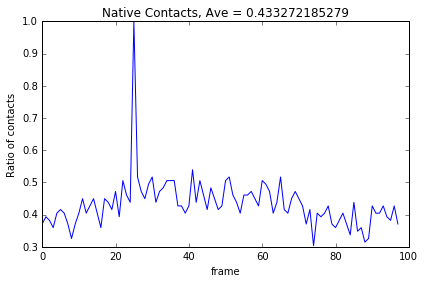

In [22]:
f, ax = plt.subplots()

ax.plot(frames, f_contacts)
ax.set(xlabel='frame', ylabel='Ratio of contacts',
       title='Native Contacts, Ave = {}'.format(np.mean(f_contacts)))

plt.tight_layout()

# Binding Analysis

Contacts can also be good to find out if two proteins have bound. We don't necessarily want to know how deep into the binding pocket the ligand is by just looking at the fraction of contacts but by checking if at least one contact in the binding pocket is below a certain distance.

Here we just use such a method as a very simple decider if a protein is folded or not.

In [47]:
def min_distance(r, r0, dist=3):
    return np.any(r <= dist)

In [55]:
nc = contacts.Contacts(u, selection=(sel_acidic, sel_basic), 
                       method=min_distance,
                       refgroup=(acidic, basic), dist=2.5)

In [56]:
nc.run()

In [57]:
folded = np.asarray(nc.timeseries)[:, 1]
frames = np.asarray(nc.timeseries)[:, 0]

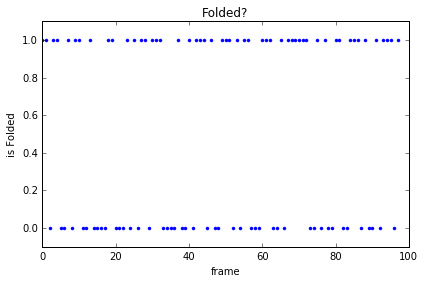

In [61]:
f, ax = plt.subplots()

ax.plot(frames, folded, '.')
ax.set(xlabel='frame', ylabel='is Folded',
       title='Folded?',
       ylim=(-0.1, 1.1))

plt.tight_layout()